In [134]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Maintenance Prédictive des Moteurs Turbofan (CMAPSS NASA)

Dataset:  **CMAPSS Jet Engine Simulated Data**

•CMAPSS signifie (**Système de Simulation Modulaire de Propulsion Aérospatiale Commerciale**), un outil de simulation développé par la NASA pour modéliser et analyser le comportement des moteurs turbofan au fil du temps

Le dataset **CMAPSS**, fourni par la NASA, est conçu pour simuler la dégradation des moteurs turbofan. Cette simulation étudie comment les pièces du moteur se détériorent sous diverses conditions (température, altitude, etc.).

## Objectif principal

- **Estimer la Durée de Vie Restante (RUL)** d'un moteur, afin de :
  - Prédire les pannes de manière préventive.
  - Optimiser la maintenance en la réalisant au bon moment pour réduire les coûts.
  - Surveiller les composants critiques (compresseurs et turbines).

## Composants du Moteur

- **Ventilateur (Fan)** : Amène l'air dans le moteur.
- **Compresseurs** (LPC, HPC) : Compressent l'air pour une combustion optimale.
- **Turbines** (LPT, HPT) : Extraient l'énergie pour faire tourner le ventilateur et les compresseurs.


## Partie 2 : Description des Données

### Données Simulées avec le CMAPSS
Le **CMAPSS** simule le comportement des moteurs turbofan dans diverses conditions opérationnelles et avec différents modes de panne. Les jeux de données sont organisés en quatre sous-ensembles (FD001, FD002, FD003, FD004), chacun ayant des conditions de fonctionnement et des modes de panne uniques :
- **FD001** : Conditions d'altitude constante (niveau de la mer), un seul mode de panne (dégradation HPC).
- **FD002** : Conditions variables (6 combinaisons d’altitude/température), un seul mode de panne (dégradation HPC).
- **FD003** : Altitude constante, deux modes de panne (dégradations HPC et du ventilateur).
- **FD004** : Conditions variables, deux modes de panne.



In [135]:
def prepare_data(feature_selection = True):
    dependent_var = ['RUL']
    column_names = ['engine', 'time', 'op_setting_1', 'op_setting_2', 
                'op_setting_3'] + [f'sm_{i}' for i in range(1, 22)]

    # voire la partie feature selection 
    #les features selectionnées
    features  = ['op_setting_1', 'op_setting_2',"sm_2", "sm_3", "sm_4", "sm_7", "sm_8",
             "sm_9", "sm_11" , "sm_12", "sm_13",  "sm_15", "sm_17", "sm_20", "sm_21"
            ]

    train_data = pd.read_csv('../../data/train_FD001.txt',delim_whitespace=True)
    train_data.columns=column_names
    
    max = pd.DataFrame(train_data.groupby('engine')['time'].max()).reset_index()
    max.columns = ['engine', 'max']
    train_data = train_data.merge(max, on=['engine'], how='left')
    train_data['RUL'] = train_data['max'] - train_data['time']
    train_data.drop('max', axis=1, inplace=True)

    test_data = pd.read_csv('../../data/test_FD001.txt', delim_whitespace=True, names=column_names)
    
    if(feature_selection == True):
        train_data = train_data[['engine', 'time' ]+features+['RUL']]
        test_data = test_data[['engine', 'time' ]+features]

    test_rul = pd.read_csv('../../data/RUL_FD001.txt', delim_whitespace=True,names=["RUL"])
    test_rul["engine"] = test_rul.index +1
    
    return train_data, test_data, test_rul

In [136]:
train_data, test_data, test_rul = prepare_data(feature_selection=True)


C:\Users\user\AppData\Local\Temp\ipykernel_27500\4194414081.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv('../../data/train_FD001.txt',delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_27500\4194414081.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data = pd.read_csv('../../data/test_FD001.txt', delim_whitespace=True, names=column_names)
C:\Users\user\AppData\Local\Temp\ipykernel_27500\4194414081.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_rul = pd.read_csv('../../data/RUL_FD001.txt', delim_whitespace=True,names=["RUL"])


In [137]:
train_data

,engine,time,op_setting_1,op_setting_2,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_15,sm_17,sm_20,sm_21,RUL
0,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
1,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
2,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
3,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
4,1,6,-0.0043,-0.0001,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8.4108,391,38.98,23.3669,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20626,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20627,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20628,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


### Génération de la variable d'état

In [138]:
conditions = [
    (train_data['RUL'] > 50),
    (train_data['RUL'] >= 20) & (train_data['RUL'] <= 50),
    (train_data['RUL'] < 20)
]
choices = [2, 1, 0]  # Bon, Avertissement, Danger
train_data['stat'] = np.select(conditions, choices)


In [139]:

conditions = [
    (test_rul['RUL'] > 50),
    (test_rul['RUL'] >= 20) & (test_rul['RUL'] <= 50),
    (test_rul['RUL'] < 20)
]
choices = [2, 1, 0]  # Bon, Avertissement, Danger
test_rul['stat'] = np.select(conditions, choices)


In [140]:
test_rul

,RUL,engine,stat
0,112,1,2
1,98,2,2
2,69,3,2
3,82,4,2
4,91,5,2
...,...,...,...
95,137,96,2
96,82,97,2
97,59,98,2
98,117,99,2


In [141]:
# train set
from sklearn.model_selection import train_test_split
X = train_data.drop(columns=["RUL","stat","engine"])
y = train_data['stat']


X_test = test_data.groupby('engine').last().reset_index().drop(columns=["engine"])
y_test=test_rul['stat']


In [142]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC

# Scaling data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X.values)
X_test_scaled = scaler.transform(X_test.values)

# Class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
weights_dict = dict(zip(np.unique(y), class_weights))

# Train SVM
svm_model = SVC(kernel='linear', class_weight=weights_dict, random_state=42)
svm_model.fit(X_train_scaled, y)


SVC(class_weight={np.int64(0): np.float64(3.4383333333333335),
                  np.int64(1): np.float64(2.218279569892473),
                  np.int64(2): np.float64(0.4427988838806611)},
    kernel='linear', random_state=42)

In [143]:
# Predict on validation set
y_pred = svm_model.predict(X_test_scaled)

# Noms des classes
class_names = [ "Danger", "Avertissement","Bon"]

In [144]:
# Importation des bibliothèques nécessaires
from sklearn.metrics import accuracy_score

# Calcul de l'accuracy globale
accuracy = accuracy_score(y_test, y_pred)

# Affichage de l'accuracy globale
print(f"Précision globale (Accuracy) du modèle SVM : {accuracy:.2f}")


Précision globale (Accuracy) du modèle SVM : 0.85


confusion matrix
[[12  1  0]
 [ 2 16  2]
 [ 0 10 57]]


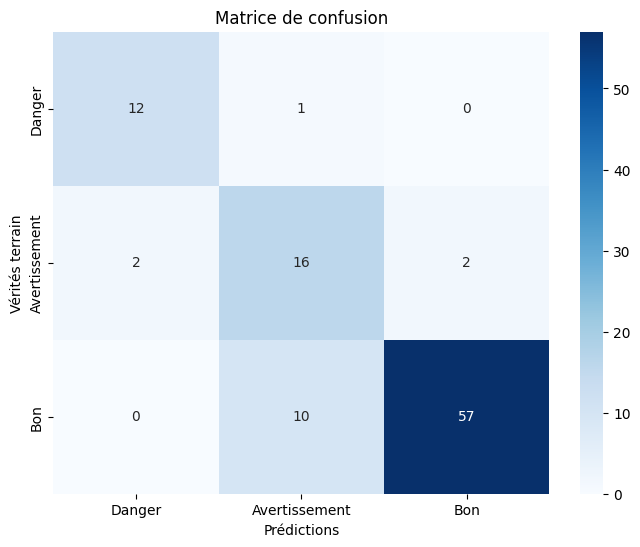

In [145]:



# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("confusion matrix")
print(conf_matrix)

# Affichage de la matrice de confusion avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.title("Matrice de confusion")
plt.show()


In [146]:
# Calcul des métriques pour chaque classe
classification_metrics = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

# Extraire les métriques pour chaque classe
metrics_table = {class_name: classification_metrics[class_name] for class_name in class_names}

# Afficher les métriques sous forme de tableau
print("\nMétriques pour chaque classe :")
for class_name, metrics in metrics_table.items():
    print(f"\nClasse {class_name} :")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.2f}")



Métriques pour chaque classe :

Classe Danger :
  precision: 0.86
  recall: 0.92
  f1-score: 0.89
  support: 13.00

Classe Avertissement :
  precision: 0.59
  recall: 0.80
  f1-score: 0.68
  support: 20.00

Classe Bon :
  precision: 0.97
  recall: 0.85
  f1-score: 0.90
  support: 67.00


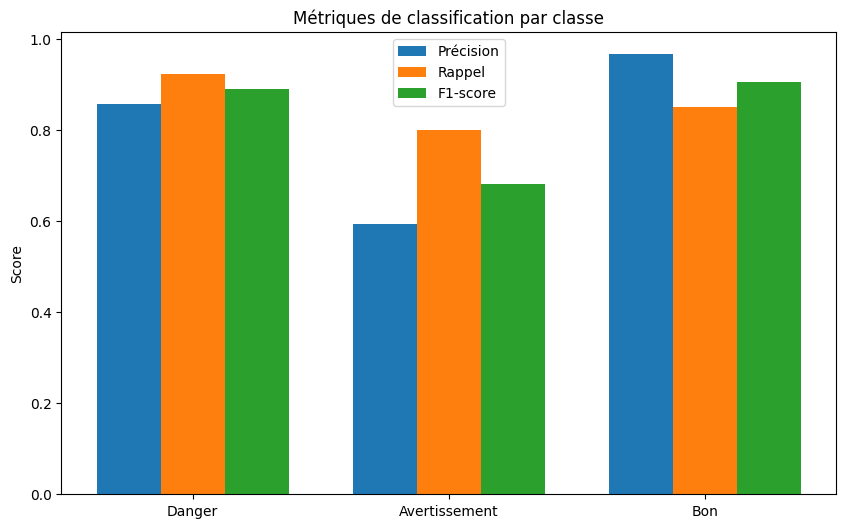

In [147]:

# Exemple : Précision, rappel et F1-score pour chaque classe
precision_scores = [metrics['precision'] for metrics in metrics_table.values()]
recall_scores = [metrics['recall'] for metrics in metrics_table.values()]
f1_scores = [metrics['f1-score'] for metrics in metrics_table.values()]

# Visualisation des métriques sous forme de graphique
labels = ["Précision", "Rappel", "F1-score"]
scores = [precision_scores, recall_scores, f1_scores]

x = np.arange(len(class_names))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
for i, score in enumerate(scores):
    ax.bar(x + i * width, score, width, label=labels[i])

ax.set_xticks(x + width)
ax.set_xticklabels(class_names)
ax.set_ylabel("Score")
ax.set_title("Métriques de classification par classe")
ax.legend()
plt.show()

In [149]:
#for bi 
engine_id=10


In [152]:
test_data_bi=test_data[test_data["engine"]==engine_id].drop(columns=["engine"])
scaled_test_data_bi = scaler.transform(test_data_bi) 

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [153]:
SVM_Stat_10=svm_model.predict(scaled_test_data_bi)

In [157]:
test_data_bi=pd.read_csv("../BI/test_engine.csv")


In [159]:
test_data_bi["svm_stat"]=SVM_Stat_10
test_data_bi=test_data_bi[["time","svm_rul","svm_stat"]]


In [160]:
test_data_bi.to_csv("../BI/test_engine.csv")